In [40]:
from covariant_integrator_library import *
from bunch_inits import *
from plotting_variables import *

font_size = 16
# Update the rcParams dictionary to set the font size globally
plt.rcParams.update({'font.size': font_size})

0.1
E_MeV =  3000000.1037635677
Gamma =  3196.979084475974
E_rest =  938.385948501337
E_MeV =  -2999967.5829306315
Gamma =  15.574339001485802
E_rest =  193020.75925874696
105.3899816056425
driver fractional energy shift [1.00000005]
rider fractional energy shift [-1.00000059]


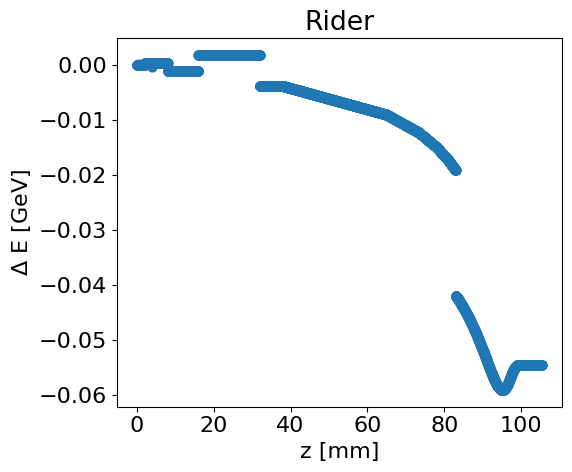

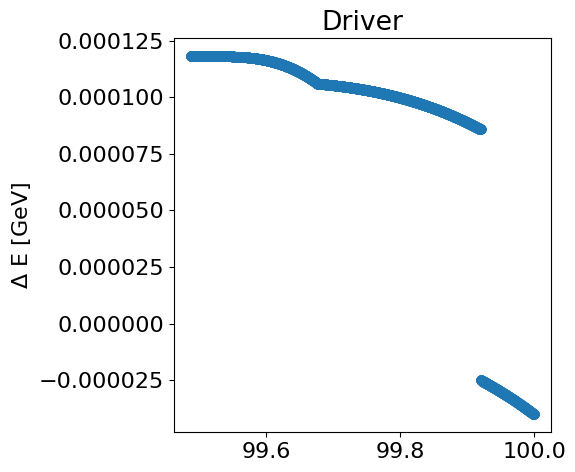

0.06723357536499334
E_MeV =  2999999.8829524014
Gamma =  3196.9788491664467
E_rest =  938.385948501337
E_MeV =  -2999937.744371493
Gamma =  15.574184733170092
E_rest =  193020.75925874696
105.3899738486098
driver fractional energy shift [1.00000005 1.00000015]
rider fractional energy shift [-1.00000059 -1.00000164]


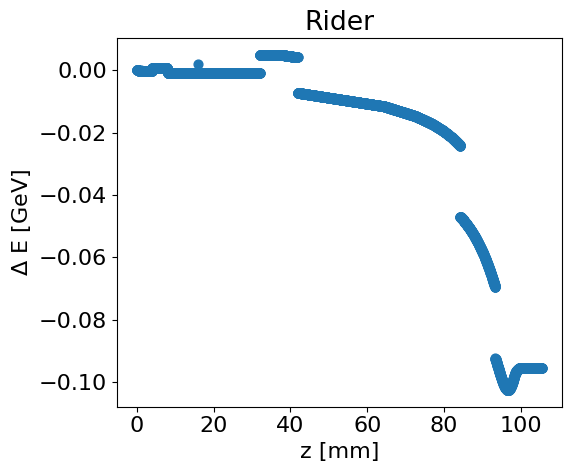

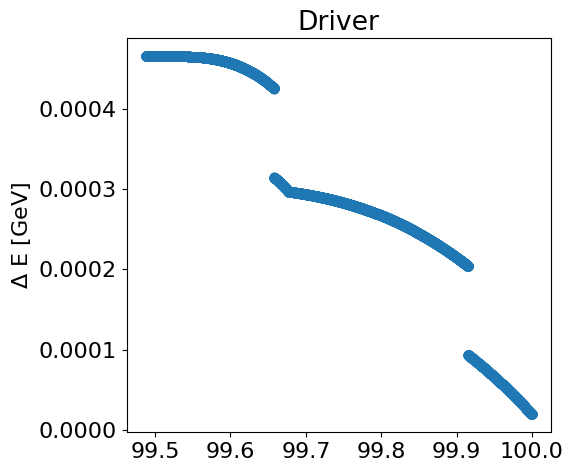

0.04520353656360243
E_MeV =  2999999.896726739
Gamma =  3196.9788638452005
E_rest =  938.385948501337
E_MeV =  -2999962.6611520285
Gamma =  15.574313555400925
E_rest =  193020.75925874696
105.38997433249106
driver fractional energy shift [1.00000005 1.00000015 1.00000067]
rider fractional energy shift [-1.00000059 -1.00000164 -1.00000153]


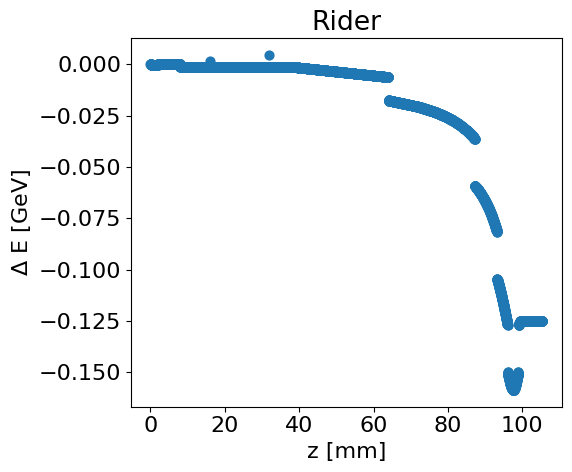

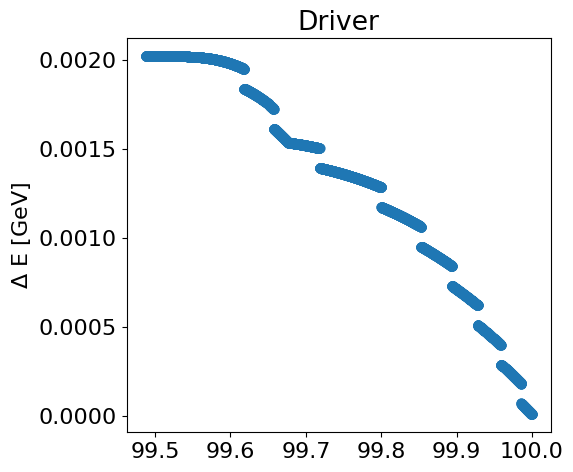

0.03039195382313198
E_MeV =  2999999.8993011825
Gamma =  3196.978866588681
E_rest =  938.385948501337
E_MeV =  -2999958.732879795
Gamma =  15.574293245842913
E_rest =  193020.75925874696
105.38997442292184
driver fractional energy shift [1.00000005 1.00000015 1.00000067 1.00000278]
rider fractional energy shift [-1.00000059 -1.00000164 -1.00000153 -1.0000013 ]


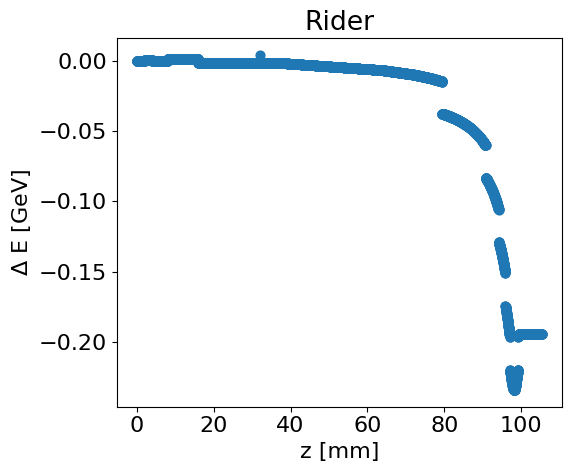

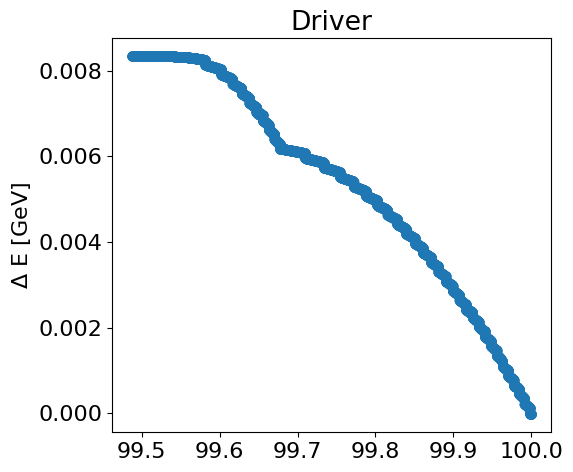

0.020433597178569417
E_MeV =  3000000.124627167
Gamma =  3196.9791067094698
E_rest =  938.385948501337
E_MeV =  -2999979.5998221664
Gamma =  15.574401130010903
E_rest =  193020.75925874696
105.38998233853252
driver fractional energy shift [1.00000005 1.00000015 1.00000067 1.00000278 1.00000965]
rider fractional energy shift [-1.00000059 -1.00000164 -1.00000153 -1.0000013  -1.00000047]


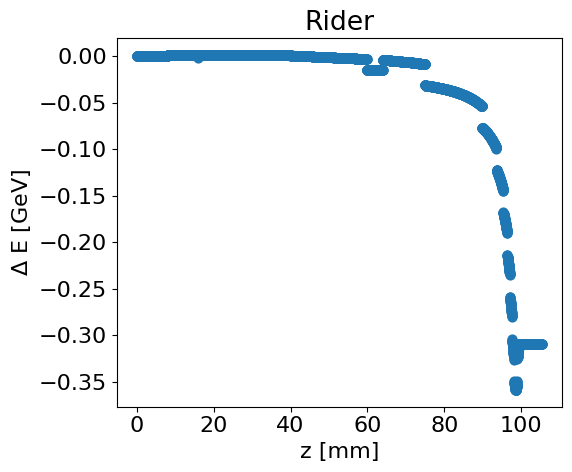

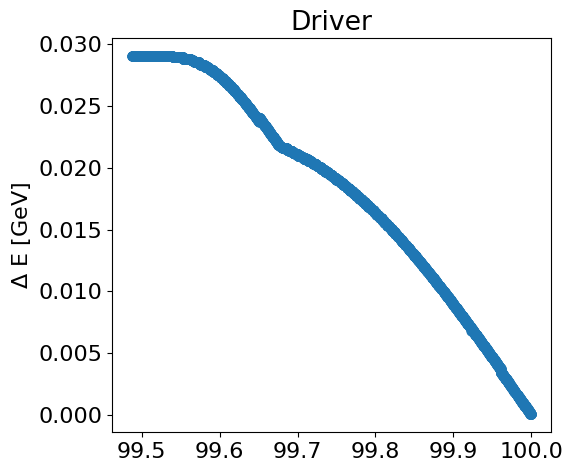

0.013738237958832623
E_MeV =  2999999.8800938646
Gamma =  3196.978846120219
E_rest =  938.385948501337
E_MeV =  -2999964.878583903
Gamma =  15.574325019744231
E_rest =  193020.75925874696
105.38997374814149
driver fractional energy shift [1.00000005 1.00000015 1.00000067 1.00000278 1.00000965 1.0000243 ]
rider fractional energy shift [-1.00000059 -1.00000164 -1.00000153 -1.0000013  -1.00000047 -1.00000176]


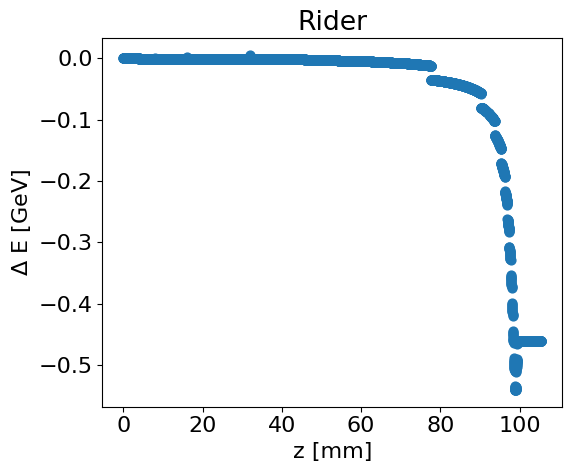

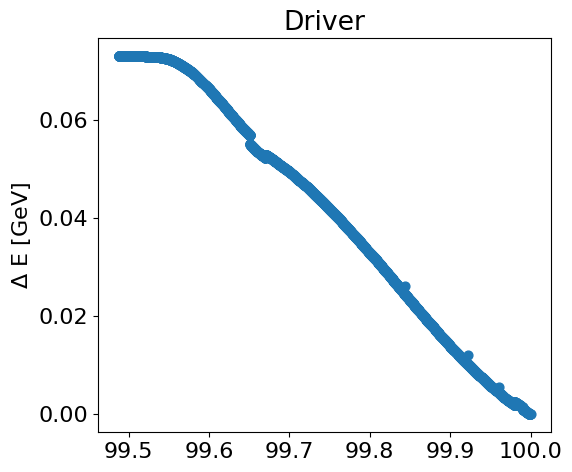

0.009236708571873866
E_MeV =  2999999.9739110414
Gamma =  3196.978946097389
E_rest =  938.385948501337
E_MeV =  -2999971.5465244357
Gamma =  15.574359493660094
E_rest =  193020.75925874696
105.3899770438735
driver fractional energy shift [1.00000005 1.00000015 1.00000067 1.00000278 1.00000965 1.0000243
 1.00003103]
rider fractional energy shift [-1.00000059 -1.00000164 -1.00000153 -1.0000013  -1.00000047 -1.00000176
 -1.00000057]


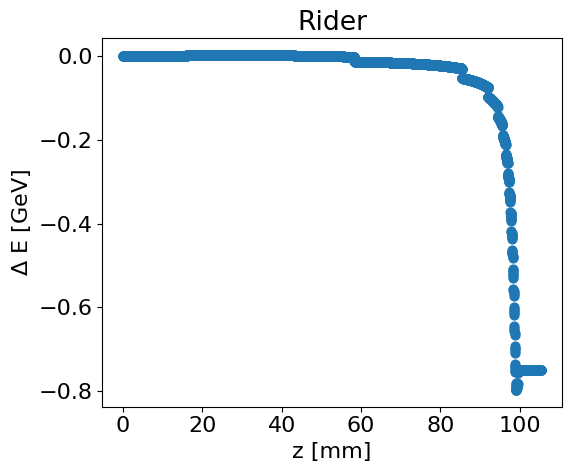

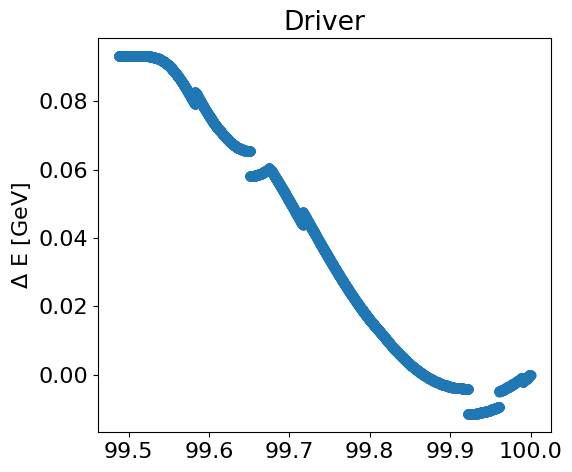

0.006210169418915616
E_MeV =  2999999.982673271
Gamma =  3196.9789554349427
E_rest =  938.385948501337
E_MeV =  -2999996.109462773
Gamma =  15.574486486497477
E_rest =  193020.75925874696
105.38997735163576
driver fractional energy shift [ 1.00000005  1.00000015  1.00000067  1.00000278  1.00000965  1.0000243
  1.00003103 -0.99994942]
rider fractional energy shift [-1.00000059 -1.00000164 -1.00000153 -1.0000013  -1.00000047 -1.00000176
 -1.00000057 -0.99956297]


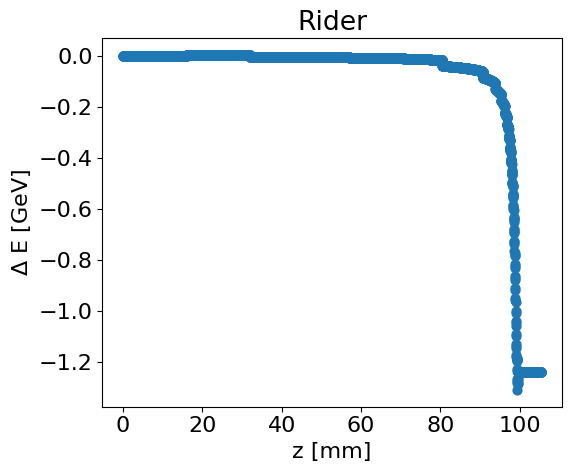

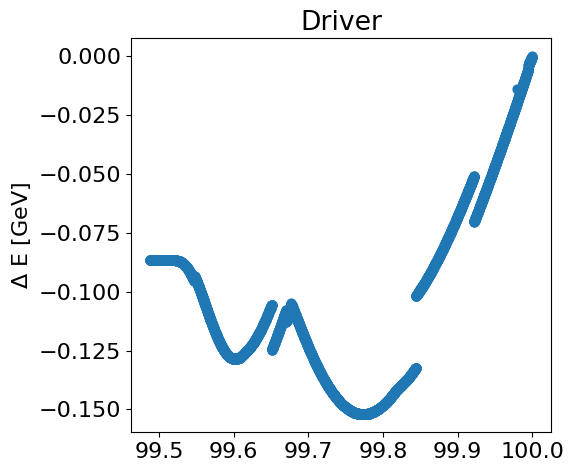

0.0041753189365604
E_MeV =  3000000.11975875
Gamma =  3196.9791015213937
E_rest =  938.385948501337
E_MeV =  -2999986.7618493503
Gamma =  15.574438158404666
E_rest =  193020.75925874696
105.38998216732998
driver fractional energy shift [ 1.00000005  1.00000015  1.00000067  1.00000278  1.00000965  1.0000243
  1.00003103 -0.99994942 -0.99973239]
rider fractional energy shift [-1.00000059 -1.00000164 -1.00000153 -1.0000013  -1.00000047 -1.00000176
 -1.00000057 -0.99956297 -0.99932106]


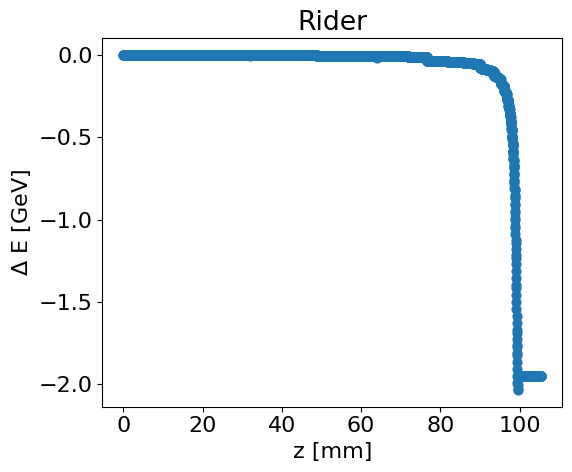

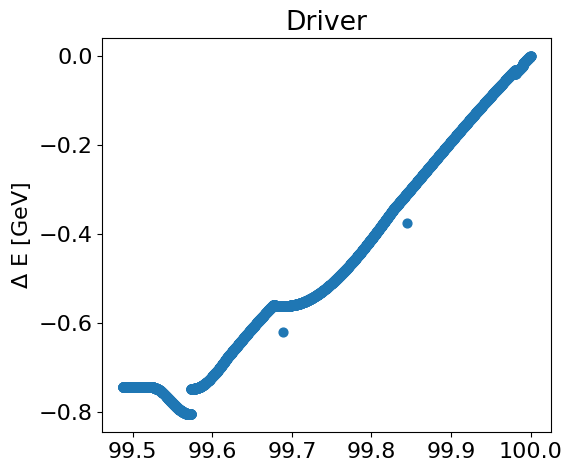

0.0028072162039411755
E_MeV =  2999999.870316433
Gamma =  3196.978835700805
E_rest =  938.385948501337
E_MeV =  -2999938.0217857766
Gamma =  15.574186167429476
E_rest =  193020.75925874696
105.38997340441931
driver fractional energy shift [ 1.00000005  1.00000015  1.00000067  1.00000278  1.00000965  1.0000243
  1.00003103 -0.99994942 -0.99973239 -0.99931818]
rider fractional energy shift [-1.00000059 -1.00000164 -1.00000153 -1.0000013  -1.00000047 -1.00000176
 -1.00000057 -0.99956297 -0.99932106 -0.99904761]


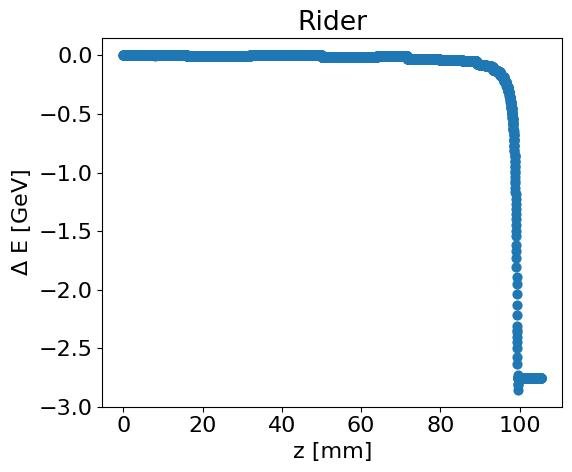

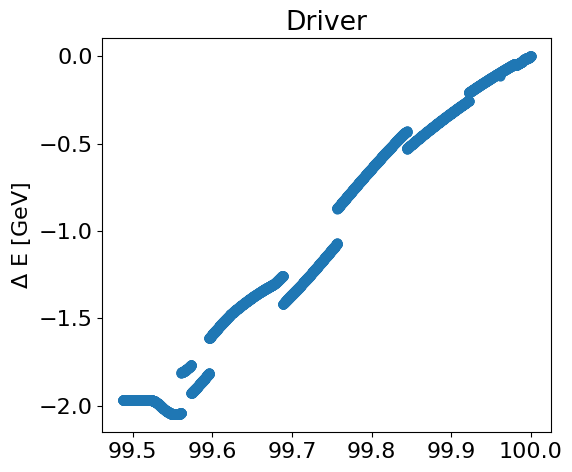

0.0018873918221350957
E_MeV =  2999999.8572907248
Gamma =  3196.9788218198346
E_rest =  938.385948501337
E_MeV =  -2999962.4496377376
Gamma =  15.574312461851008
E_rest =  193020.75925874696
105.38997294675772
driver fractional energy shift [ 1.00000005  1.00000015  1.00000067  1.00000278  1.00000965  1.0000243
  1.00003103 -0.99994942 -0.99973239 -0.99931818 -0.99881404]
rider fractional energy shift [-1.00000059 -1.00000164 -1.00000153 -1.0000013  -1.00000047 -1.00000176
 -1.00000057 -0.99956297 -0.99932106 -0.99904761 -0.99877348]


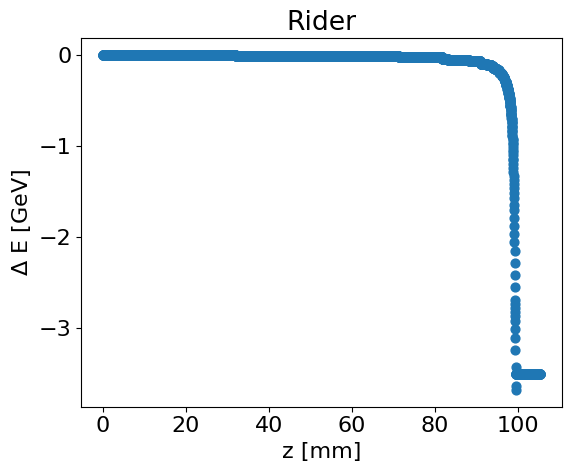

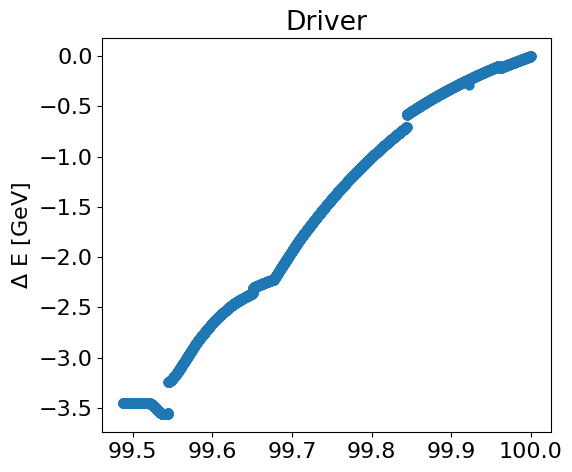

0.0012689610031679222
E_MeV =  3000000.017804735
Gamma =  3196.978992873123
E_rest =  938.385948501337
E_MeV =  -2999935.714478614
Gamma =  15.574174238422433
E_rest =  193020.75925874696
105.38997858549479
driver fractional energy shift [ 1.00000005  1.00000015  1.00000067  1.00000278  1.00000965  1.0000243
  1.00003103 -0.99994942 -0.99973239 -0.99931818 -0.99881404 -0.99848641]
rider fractional energy shift [-1.00000059 -1.00000164 -1.00000153 -1.0000013  -1.00000047 -1.00000176
 -1.00000057 -0.99956297 -0.99932106 -0.99904761 -0.99877348 -0.99847239]


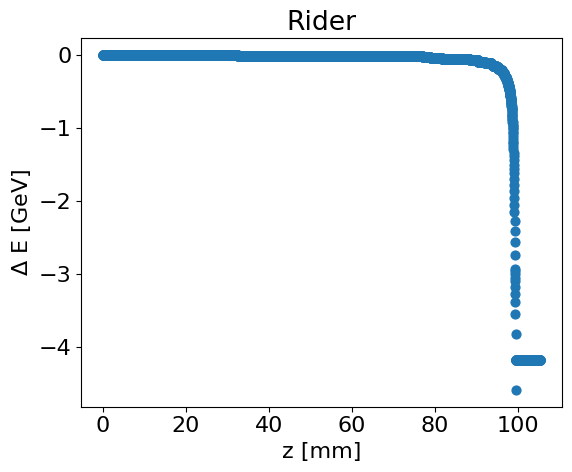

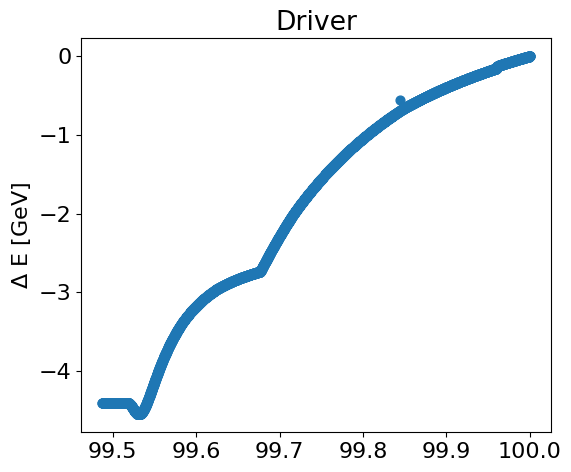

0.0008531678524172806
E_MeV =  3000000.0897899345
Gamma =  3196.9790695848396
E_rest =  938.385948501337
E_MeV =  -2999952.69157741
Gamma =  15.574262011709147
E_rest =  193020.75925874696
105.38998111421934
driver fractional energy shift [ 1.00000005  1.00000015  1.00000067  1.00000278  1.00000965  1.0000243
  1.00003103 -0.99994942 -0.99973239 -0.99931818 -0.99881404 -0.99848641
 -0.99738238]
rider fractional energy shift [-1.00000059 -1.00000164 -1.00000153 -1.0000013  -1.00000047 -1.00000176
 -1.00000057 -0.99956297 -0.99932106 -0.99904761 -0.99877348 -0.99847239
 -0.99820288]


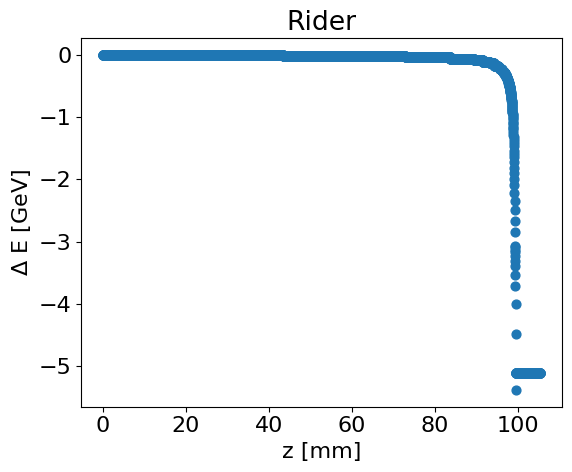

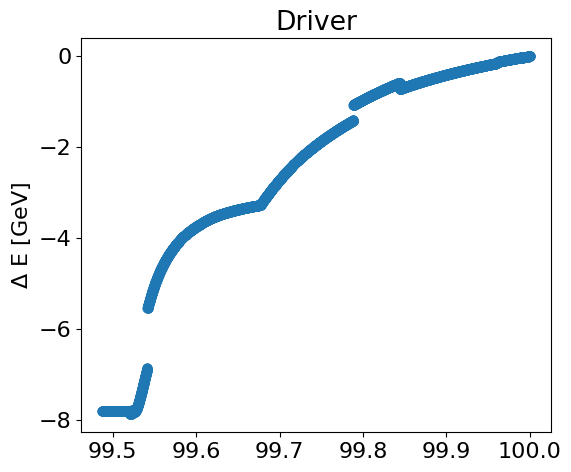

0.0005736152510448676
E_MeV =  3000000.12676344
Gamma =  3196.979108986009
E_rest =  938.385948501337
E_MeV =  -2999942.130815062
Gamma =  15.574207411518813
E_rest =  193020.75925874696
105.3899824128788
driver fractional energy shift [ 1.00000005  1.00000015  1.00000067  1.00000278  1.00000965  1.0000243
  1.00003103 -0.99994942 -0.99973239 -0.99931818 -0.99881404 -0.99848641
 -0.99738238 -0.99657942]
rider fractional energy shift [-1.00000059 -1.00000164 -1.00000153 -1.0000013  -1.00000047 -1.00000176
 -1.00000057 -0.99956297 -0.99932106 -0.99904761 -0.99877348 -0.99847239
 -0.99820288 -0.99754835]


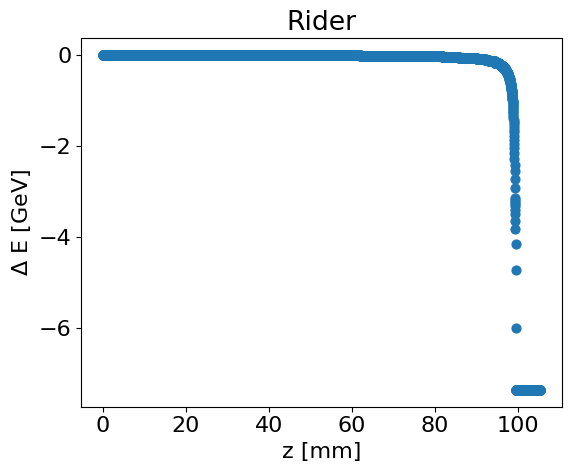

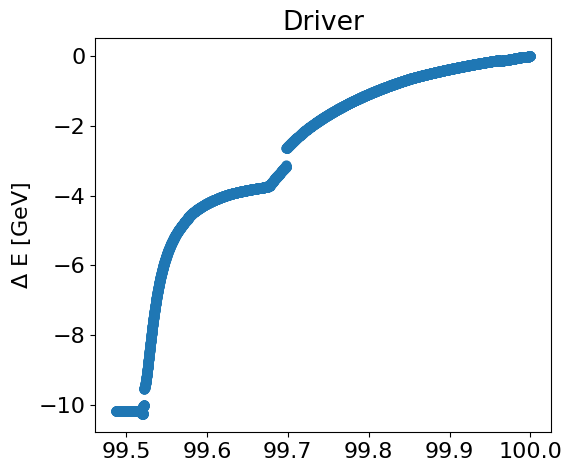

0.00038566204211634724
E_MeV =  3000000.0540779443
Gamma =  3196.9790315280156
E_rest =  938.385948501337
E_MeV =  -2999965.753609971
Gamma =  15.574329543716031
E_rest =  193020.75925874696
105.38997985911057
driver fractional energy shift [ 1.00000005  1.00000015  1.00000067  1.00000278  1.00000965  1.0000243
  1.00003103 -0.99994942 -0.99973239 -0.99931818 -0.99881404 -0.99848641
 -0.99738238 -0.99657942 -0.99210289]
rider fractional energy shift [-1.00000059 -1.00000164 -1.00000153 -1.0000013  -1.00000047 -1.00000176
 -1.00000057 -0.99956297 -0.99932106 -0.99904761 -0.99877348 -0.99847239
 -0.99820288 -0.99754835 -0.99622769]


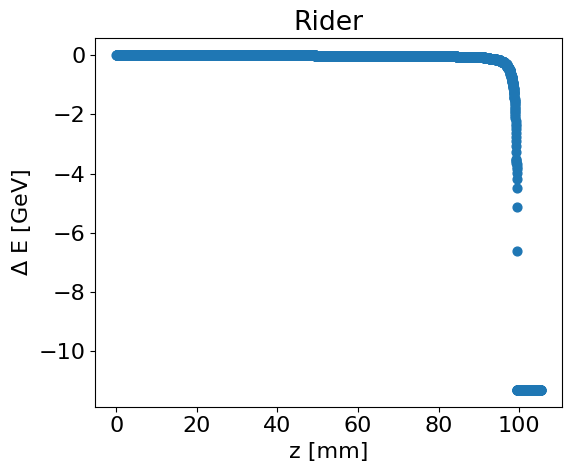

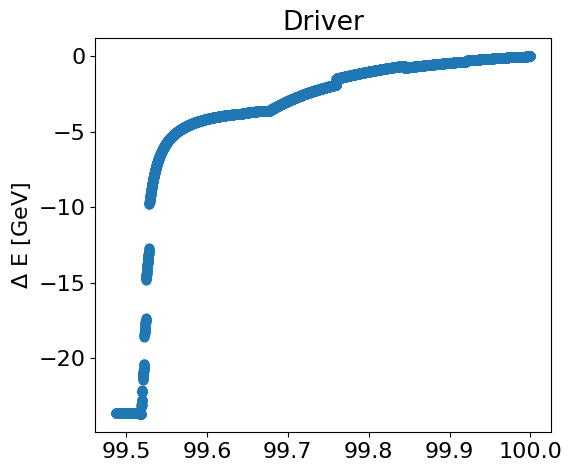

0.0002592943797404667
E_MeV =  3000000.089532725
Gamma =  3196.979069310741
E_rest =  938.385948501337
E_MeV =  -2999987.6132053635
Gamma =  15.574442560000058
E_rest =  193020.75925874696
105.3899811042798
driver fractional energy shift [ 1.00000005  1.00000015  1.00000067  1.00000278  1.00000965  1.0000243
  1.00003103 -0.99994942 -0.99973239 -0.99931818 -0.99881404 -0.99848641
 -0.99738238 -0.99657942 -0.99210289 -0.98487801]
rider fractional energy shift [-1.00000059 -1.00000164 -1.00000153 -1.0000013  -1.00000047 -1.00000176
 -1.00000057 -0.99956297 -0.99932106 -0.99904761 -0.99877348 -0.99847239
 -0.99820288 -0.99754835 -0.99622769 -0.99470734]


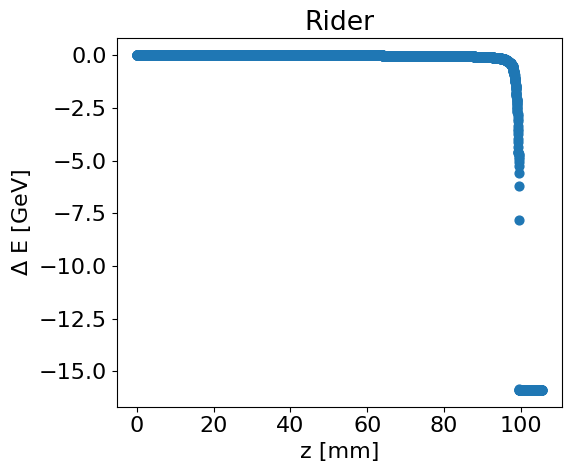

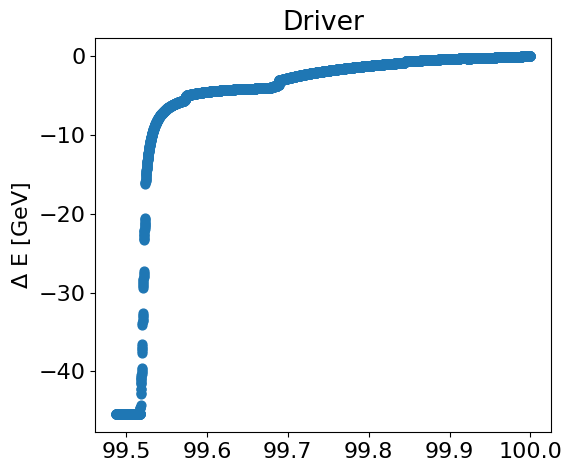

0.00017433288221999874
E_MeV =  2999999.8858236847
Gamma =  3196.9788522262565
E_rest =  938.385948501337
E_MeV =  -2999936.4652765826
Gamma =  15.574178120122445
E_rest =  193020.75925874696
105.38997394774282
driver fractional energy shift [ 1.00000005  1.00000015  1.00000067  1.00000278  1.00000965  1.0000243
  1.00003103 -0.99994942 -0.99973239 -0.99931818 -0.99881404 -0.99848641
 -0.99738238 -0.99657942 -0.99210289 -0.98487801 -0.96284357]
rider fractional energy shift [-1.00000059 -1.00000164 -1.00000153 -1.0000013  -1.00000047 -1.00000176
 -1.00000057 -0.99956297 -0.99932106 -0.99904761 -0.99877348 -0.99847239
 -0.99820288 -0.99754835 -0.99622769 -0.99470734 -0.99256575]


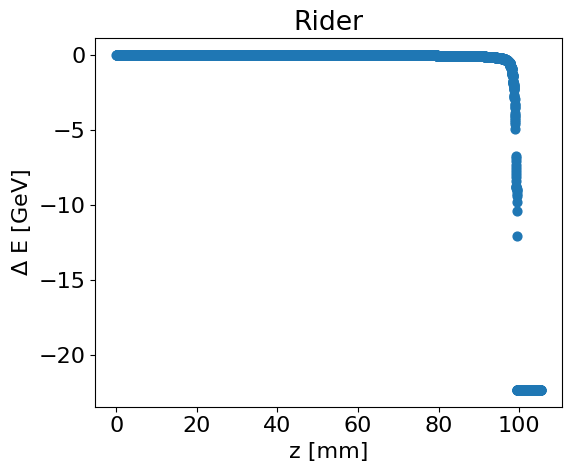

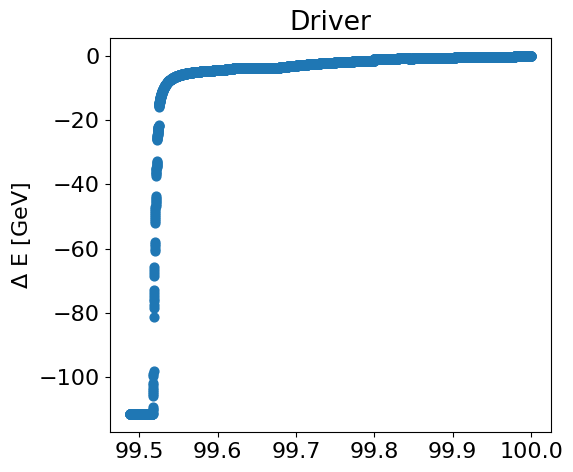

0.00011721022975334794
E_MeV =  3000000.0972165205
Gamma =  3196.979077499051
E_rest =  938.385948501337
E_MeV =  -2999993.4793000035
Gamma =  15.574472888293823
E_rest =  193020.75925874696
105.38998137230135
driver fractional energy shift [ 1.00000005  1.00000015  1.00000067  1.00000278  1.00000965  1.0000243
  1.00003103 -0.99994942 -0.99973239 -0.99931818 -0.99881404 -0.99848641
 -0.99738238 -0.99657942 -0.99210289 -0.98487801 -0.96284357 -0.88519834]
rider fractional energy shift [-1.00000059 -1.00000164 -1.00000153 -1.0000013  -1.00000047 -1.00000176
 -1.00000057 -0.99956297 -0.99932106 -0.99904761 -0.99877348 -0.99847239
 -0.99820288 -0.99754835 -0.99622769 -0.99470734 -0.99256575 -0.98662454]


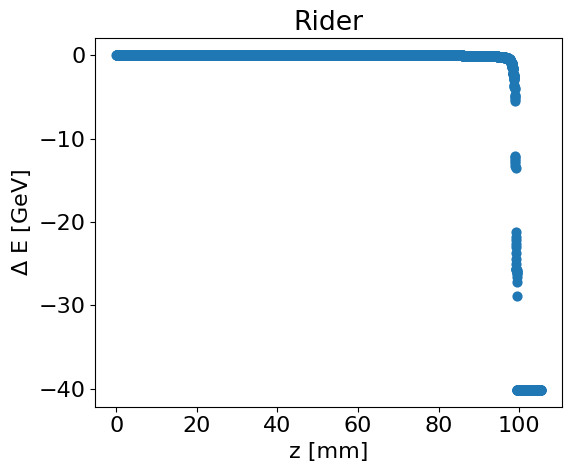

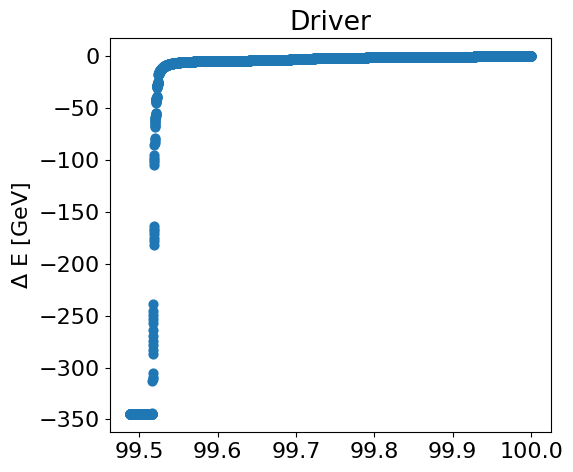

7.880462815669905e-05
E_MeV =  2999999.973303306
Gamma =  3196.97894544975
E_rest =  938.385948501337
E_MeV =  -2999956.9137459598
Gamma =  15.574283840740156
E_rest =  193020.75925874696
105.38997701958876
driver fractional energy shift [ 1.00000005  1.00000015  1.00000067  1.00000278  1.00000965  1.0000243
  1.00003103 -0.99994942 -0.99973239 -0.99931818 -0.99881404 -0.99848641
 -0.99738238 -0.99657942 -0.99210289 -0.98487801 -0.96284357 -0.88519834
 -0.82691918]
rider fractional energy shift [-1.00000059 -1.00000164 -1.00000153 -1.0000013  -1.00000047 -1.00000176
 -1.00000057 -0.99956297 -0.99932106 -0.99904761 -0.99877348 -0.99847239
 -0.99820288 -0.99754835 -0.99622769 -0.99470734 -0.99256575 -0.98662454
 -0.984981  ]


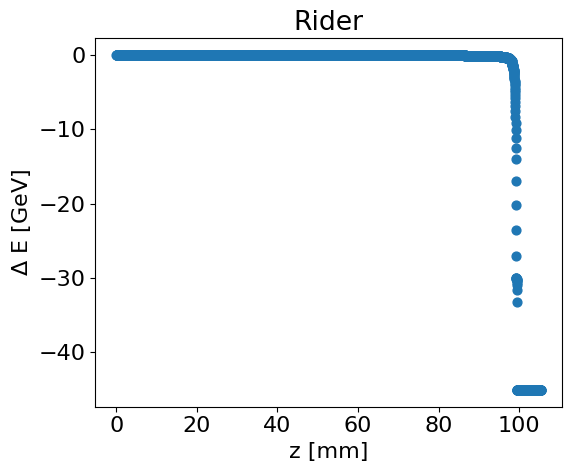

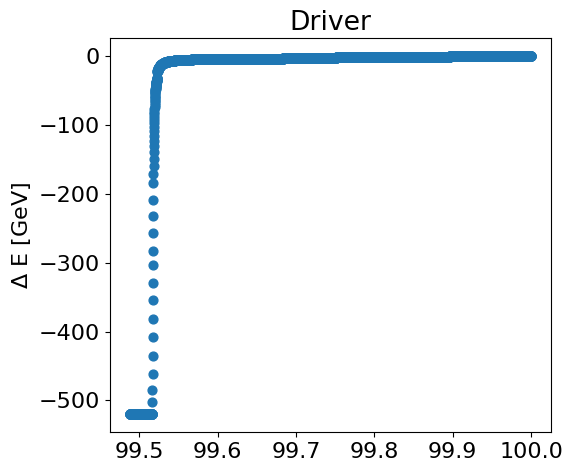

5.298316906283702e-05
E_MeV =  3000000.05047968
Gamma =  3196.979027693491
E_rest =  938.385948501337
E_MeV =  -2999960.0833132626
Gamma =  15.57430022771819
E_rest =  193020.75925874696
105.3899797287872
driver fractional energy shift [ 1.00000005  1.00000015  1.00000067  1.00000278  1.00000965  1.0000243
  1.00003103 -0.99994942 -0.99973239 -0.99931818 -0.99881404 -0.99848641
 -0.99738238 -0.99657942 -0.99210289 -0.98487801 -0.96284357 -0.88519834
 -0.82691918 -0.59538744]
rider fractional energy shift [-1.00000059 -1.00000164 -1.00000153 -1.0000013  -1.00000047 -1.00000176
 -1.00000057 -0.99956297 -0.99932106 -0.99904761 -0.99877348 -0.99847239
 -0.99820288 -0.99754835 -0.99622769 -0.99470734 -0.99256575 -0.98662454
 -0.984981   -0.97941057]


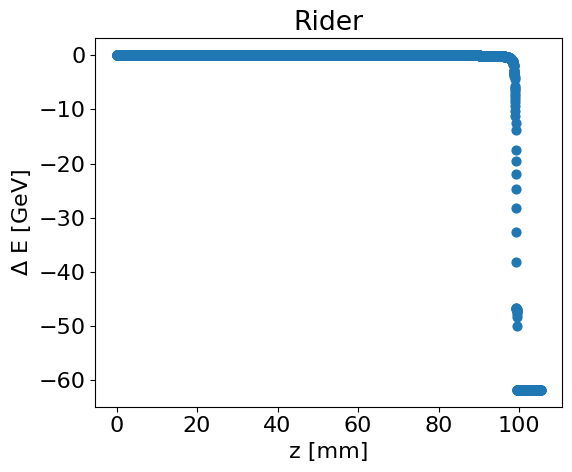

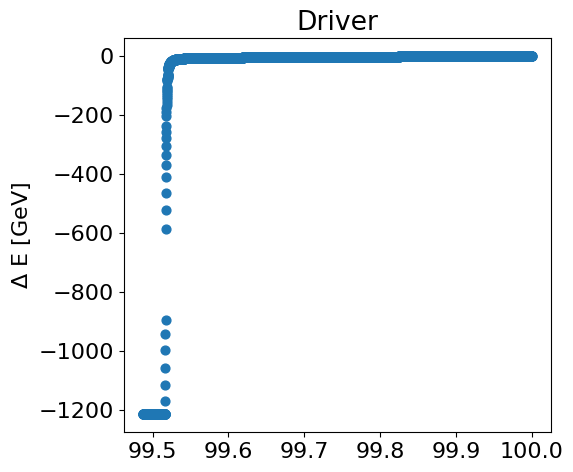

3.562247890262437e-05
E_MeV =  3000000.078165953
Gamma =  3196.9790571976323
E_rest =  938.385948501337
E_MeV =  -2999988.1956280693
Gamma =  15.57444557118347
E_rest =  193020.75925874696
105.38998068870944
driver fractional energy shift [ 1.00000005  1.00000015  1.00000067  1.00000278  1.00000965  1.0000243
  1.00003103 -0.99994942 -0.99973239 -0.99931818 -0.99881404 -0.99848641
 -0.99738238 -0.99657942 -0.99210289 -0.98487801 -0.96284357 -0.88519834
 -0.82691918 -0.59538744 -0.48071915]
rider fractional energy shift [-1.00000059 -1.00000164 -1.00000153 -1.0000013  -1.00000047 -1.00000176
 -1.00000057 -0.99956297 -0.99932106 -0.99904761 -0.99877348 -0.99847239
 -0.99820288 -0.99754835 -0.99622769 -0.99470734 -0.99256575 -0.98662454
 -0.984981   -0.97941057 -0.96045405]


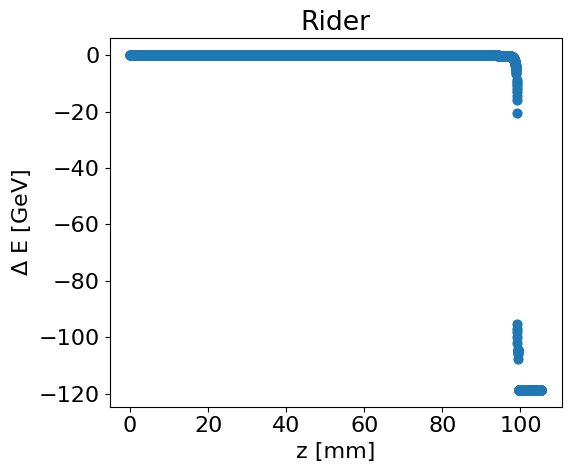

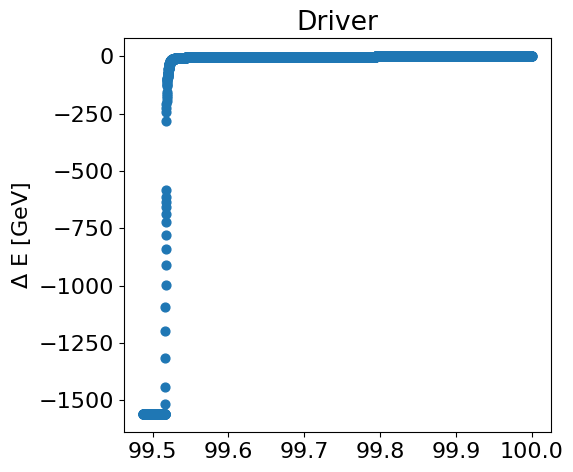

2.3950266199874812e-05
E_MeV =  3000000.085067819
Gamma =  3196.9790645526705
E_rest =  938.385948501337
E_MeV =  -2999954.6033797893
Gamma =  15.57427189591743
E_rest =  193020.75925874696
105.38998093411826
driver fractional energy shift [ 1.00000005  1.00000015  1.00000067  1.00000278  1.00000965  1.0000243
  1.00003103 -0.99994942 -0.99973239 -0.99931818 -0.99881404 -0.99848641
 -0.99738238 -0.99657942 -0.99210289 -0.98487801 -0.96284357 -0.88519834
 -0.82691918 -0.59538744 -0.48071915 -0.38704584]
rider fractional energy shift [-1.00000059 -1.00000164 -1.00000153 -1.0000013  -1.00000047 -1.00000176
 -1.00000057 -0.99956297 -0.99932106 -0.99904761 -0.99877348 -0.99847239
 -0.99820288 -0.99754835 -0.99622769 -0.99470734 -0.99256575 -0.98662454
 -0.984981   -0.97941057 -0.96045405 -0.96490815]


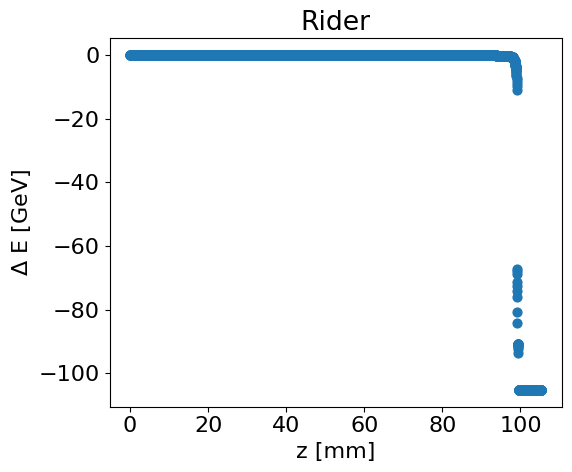

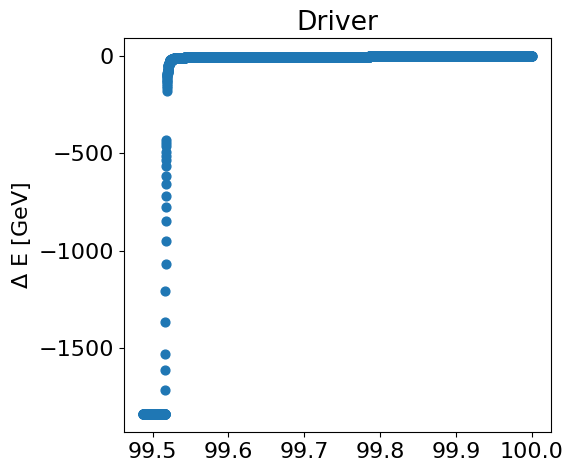

1.610262027560939e-05
E_MeV =  2999999.885591437
Gamma =  3196.9788519787594
E_rest =  938.385948501337
E_MeV =  -2999978.8226430784
Gamma =  15.574397111917643
E_rest =  193020.75925874696
105.38997393290946
driver fractional energy shift [ 1.00000005  1.00000015  1.00000067  1.00000278  1.00000965  1.0000243
  1.00003103 -0.99994942 -0.99973239 -0.99931818 -0.99881404 -0.99848641
 -0.99738238 -0.99657942 -0.99210289 -0.98487801 -0.96284357 -0.88519834
 -0.82691918 -0.59538744 -0.48071915 -0.38704584 -0.23973371]
rider fractional energy shift [-1.00000059 -1.00000164 -1.00000153 -1.0000013  -1.00000047 -1.00000176
 -1.00000057 -0.99956297 -0.99932106 -0.99904761 -0.99877348 -0.99847239
 -0.99820288 -0.99754835 -0.99622769 -0.99470734 -0.99256575 -0.98662454
 -0.984981   -0.97941057 -0.96045405 -0.96490815 -0.97261008]


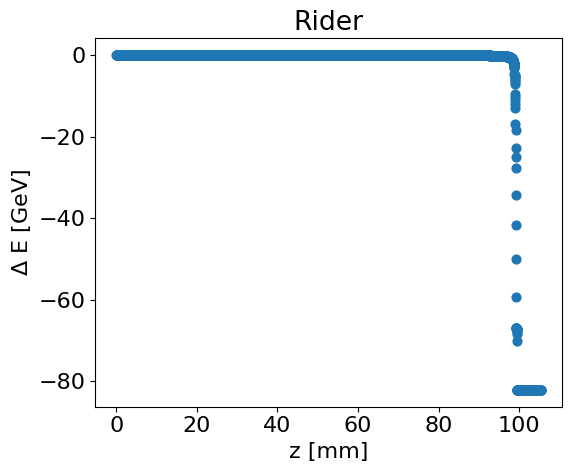

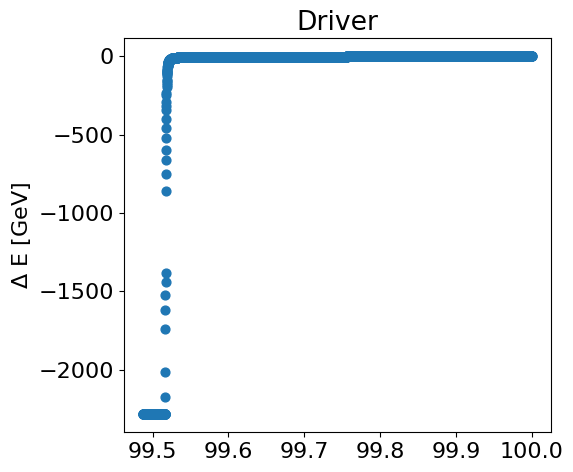

1.082636733874054e-05
E_MeV =  3000000.04553485
Gamma =  3196.9790224239855
E_rest =  938.385948501337
E_MeV =  -2999994.122481092
Gamma =  15.574476213604148
E_rest =  193020.75925874696
105.38997955275923
driver fractional energy shift [ 1.00000005  1.00000015  1.00000067  1.00000278  1.00000965  1.0000243
  1.00003103 -0.99994942 -0.99973239 -0.99931818 -0.99881404 -0.99848641
 -0.99738238 -0.99657942 -0.99210289 -0.98487801 -0.96284357 -0.88519834
 -0.82691918 -0.59538744 -0.48071915 -0.38704584 -0.23973371 -0.23486556]
rider fractional energy shift [-1.00000059 -1.00000164 -1.00000153 -1.0000013  -1.00000047 -1.00000176
 -1.00000057 -0.99956297 -0.99932106 -0.99904761 -0.99877348 -0.99847239
 -0.99820288 -0.99754835 -0.99622769 -0.99470734 -0.99256575 -0.98662454
 -0.984981   -0.97941057 -0.96045405 -0.96490815 -0.97261008 -0.97476548]


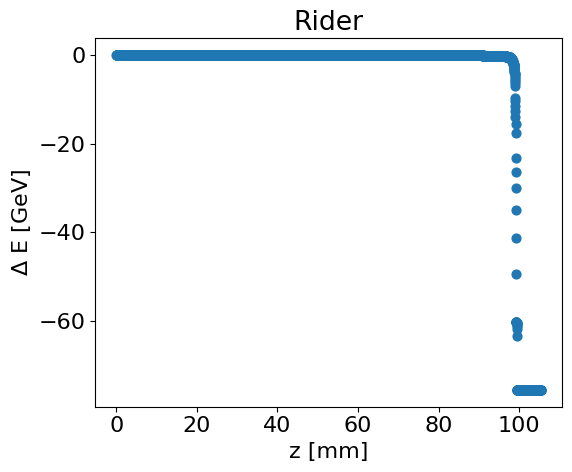

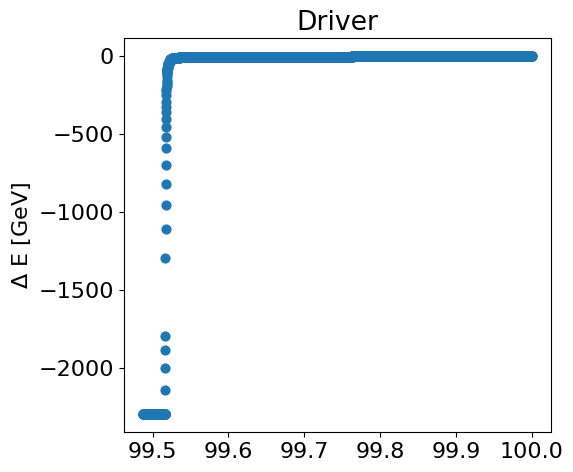

7.2789538439831465e-06
E_MeV =  3000000.134833945
Gamma =  3196.97911758642
E_rest =  938.385948501337
E_MeV =  -2999991.1304264334
Gamma =  15.574460744383403
E_rest =  193020.75925874696
105.38998268976103
driver fractional energy shift [ 1.00000005  1.00000015  1.00000067  1.00000278  1.00000965  1.0000243
  1.00003103 -0.99994942 -0.99973239 -0.99931818 -0.99881404 -0.99848641
 -0.99738238 -0.99657942 -0.99210289 -0.98487801 -0.96284357 -0.88519834
 -0.82691918 -0.59538744 -0.48071915 -0.38704584 -0.23973371 -0.23486556
 -0.22482001]
rider fractional energy shift [-1.00000059 -1.00000164 -1.00000153 -1.0000013  -1.00000047 -1.00000176
 -1.00000057 -0.99956297 -0.99932106 -0.99904761 -0.99877348 -0.99847239
 -0.99820288 -0.99754835 -0.99622769 -0.99470734 -0.99256575 -0.98662454
 -0.984981   -0.97941057 -0.96045405 -0.96490815 -0.97261008 -0.97476548
 -0.97472039]


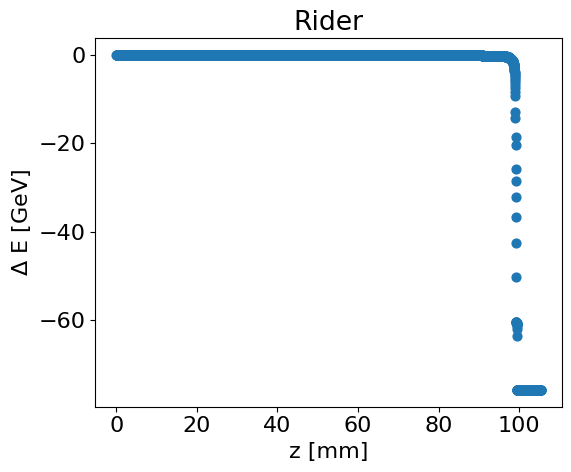

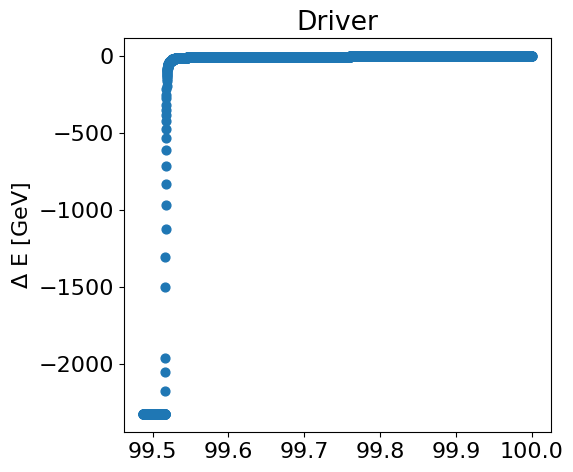

4.893900918477489e-06
E_MeV =  3000000.100150145
Gamma =  3196.979080625297
E_rest =  938.385948501337
E_MeV =  -2999937.8093004925
Gamma =  15.574185068859462
E_rest =  193020.75925874696
105.38998146149802
driver fractional energy shift [ 1.00000005  1.00000015  1.00000067  1.00000278  1.00000965  1.0000243
  1.00003103 -0.99994942 -0.99973239 -0.99931818 -0.99881404 -0.99848641
 -0.99738238 -0.99657942 -0.99210289 -0.98487801 -0.96284357 -0.88519834
 -0.82691918 -0.59538744 -0.48071915 -0.38704584 -0.23973371 -0.23486556
 -0.22482001 -0.12911127]
rider fractional energy shift [-1.00000059 -1.00000164 -1.00000153 -1.0000013  -1.00000047 -1.00000176
 -1.00000057 -0.99956297 -0.99932106 -0.99904761 -0.99877348 -0.99847239
 -0.99820288 -0.99754835 -0.99622769 -0.99470734 -0.99256575 -0.98662454
 -0.984981   -0.97941057 -0.96045405 -0.96490815 -0.97261008 -0.97476548
 -0.97472039 -0.96088098]


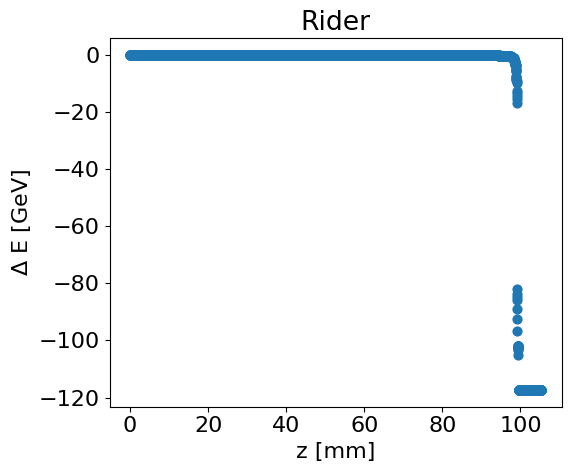

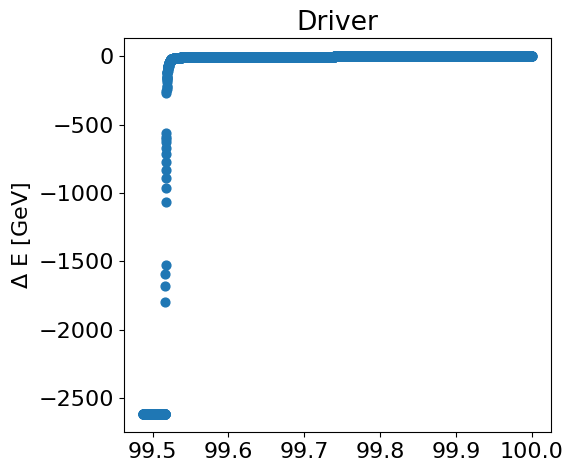

3.290344562312664e-06
E_MeV =  2999999.9713355564
Gamma =  3196.9789433527985
E_rest =  938.385948501337
E_MeV =  -2999945.0327363494
Gamma =  15.574222414740033
E_rest =  193020.75925874696
105.38997694533082
driver fractional energy shift [ 1.00000005  1.00000015  1.00000067  1.00000278  1.00000965  1.0000243
  1.00003103 -0.99994942 -0.99973239 -0.99931818 -0.99881404 -0.99848641
 -0.99738238 -0.99657942 -0.99210289 -0.98487801 -0.96284357 -0.88519834
 -0.82691918 -0.59538744 -0.48071915 -0.38704584 -0.23973371 -0.23486556
 -0.22482001 -0.12911127 -0.21124086]
rider fractional energy shift [-1.00000059 -1.00000164 -1.00000153 -1.0000013  -1.00000047 -1.00000176
 -1.00000057 -0.99956297 -0.99932106 -0.99904761 -0.99877348 -0.99847239
 -0.99820288 -0.99754835 -0.99622769 -0.99470734 -0.99256575 -0.98662454
 -0.984981   -0.97941057 -0.96045405 -0.96490815 -0.97261008 -0.97476548
 -0.97472039 -0.96088098 -0.97365221]


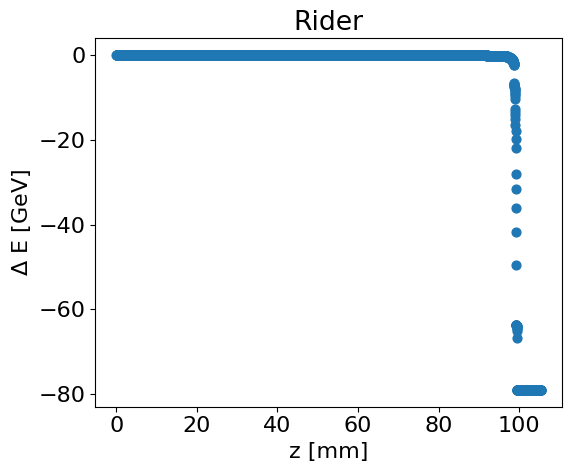

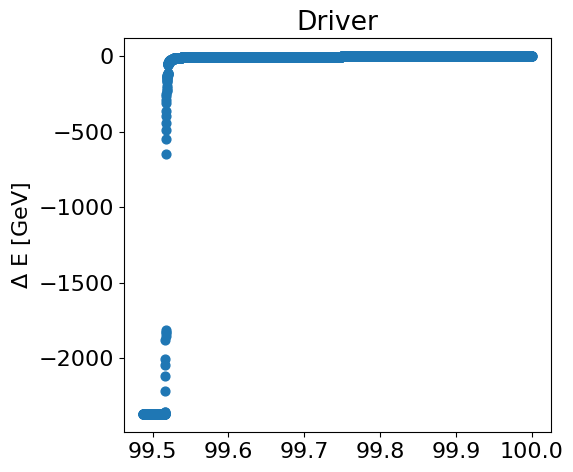

2.2122162910704457e-06
E_MeV =  2999999.896032825
Gamma =  3196.978863105725
E_rest =  938.385948501337
E_MeV =  -2999975.0023925235
Gamma =  15.574377360842016
E_rest =  193020.75925874696
105.38997428953938
driver fractional energy shift [ 1.00000005  1.00000015  1.00000067  1.00000278  1.00000965  1.0000243
  1.00003103 -0.99994942 -0.99973239 -0.99931818 -0.99881404 -0.99848641
 -0.99738238 -0.99657942 -0.99210289 -0.98487801 -0.96284357 -0.88519834
 -0.82691918 -0.59538744 -0.48071915 -0.38704584 -0.23973371 -0.23486556
 -0.22482001 -0.12911127 -0.21124086 -0.24532544]
rider fractional energy shift [-1.00000059 -1.00000164 -1.00000153 -1.0000013  -1.00000047 -1.00000176
 -1.00000057 -0.99956297 -0.99932106 -0.99904761 -0.99877348 -0.99847239
 -0.99820288 -0.99754835 -0.99622769 -0.99470734 -0.99256575 -0.98662454
 -0.984981   -0.97941057 -0.96045405 -0.96490815 -0.97261008 -0.97476548
 -0.97472039 -0.96088098 -0.97365221 -0.95961654]


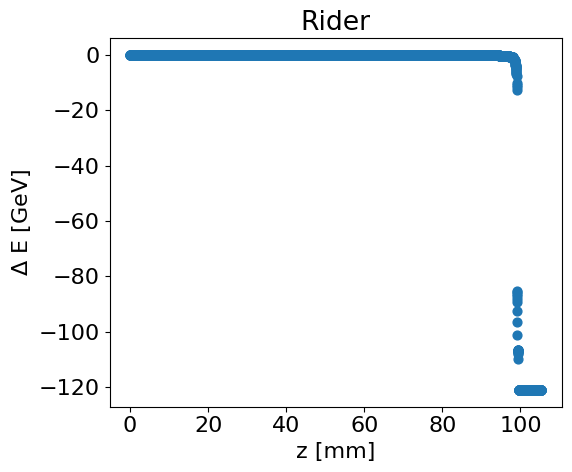

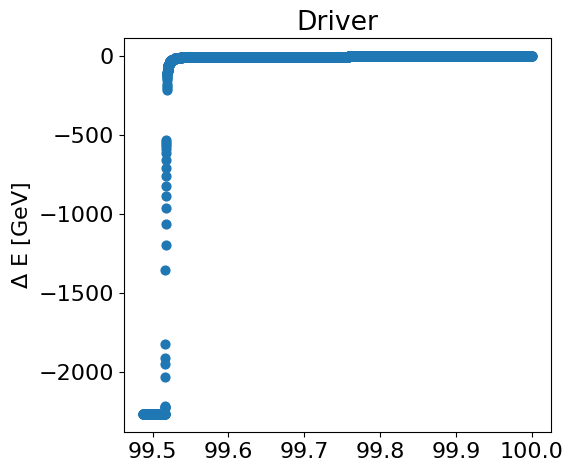

1.487352107293512e-06
E_MeV =  3000000.0151747656
Gamma =  3196.978990070472
E_rest =  938.385948501337
E_MeV =  -2999959.021670178
Gamma =  15.574294738917905
E_rest =  193020.75925874696
105.3899784853579
driver fractional energy shift [ 1.00000005  1.00000015  1.00000067  1.00000278  1.00000965  1.0000243
  1.00003103 -0.99994942 -0.99973239 -0.99931818 -0.99881404 -0.99848641
 -0.99738238 -0.99657942 -0.99210289 -0.98487801 -0.96284357 -0.88519834
 -0.82691918 -0.59538744 -0.48071915 -0.38704584 -0.23973371 -0.23486556
 -0.22482001 -0.12911127 -0.21124086 -0.24532544 -0.20102733]
rider fractional energy shift [-1.00000059 -1.00000164 -1.00000153 -1.0000013  -1.00000047 -1.00000176
 -1.00000057 -0.99956297 -0.99932106 -0.99904761 -0.99877348 -0.99847239
 -0.99820288 -0.99754835 -0.99622769 -0.99470734 -0.99256575 -0.98662454
 -0.984981   -0.97941057 -0.96045405 -0.96490815 -0.97261008 -0.97476548
 -0.97472039 -0.96088098 -0.97365221 -0.95961654 -0.97333177]


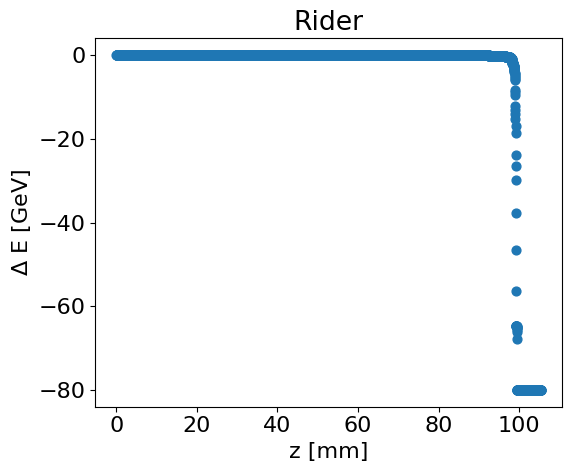

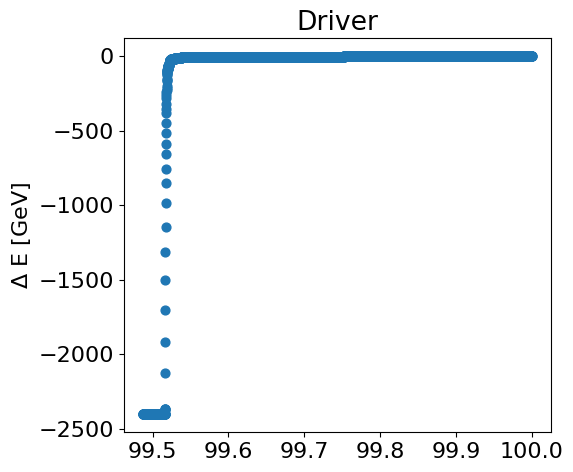

1e-06
E_MeV =  3000000.0058633545
Gamma =  3196.9789801476777
E_rest =  938.385948501337
E_MeV =  -2999936.7636973867
Gamma =  15.574179662987621
E_rest =  193020.75925874696
105.38997815877403
driver fractional energy shift [ 1.00000005  1.00000015  1.00000067  1.00000278  1.00000965  1.0000243
  1.00003103 -0.99994942 -0.99973239 -0.99931818 -0.99881404 -0.99848641
 -0.99738238 -0.99657942 -0.99210289 -0.98487801 -0.96284357 -0.88519834
 -0.82691918 -0.59538744 -0.48071915 -0.38704584 -0.23973371 -0.23486556
 -0.22482001 -0.12911127 -0.21124086 -0.24532544 -0.20102733 -0.18937443]
rider fractional energy shift [-1.00000059 -1.00000164 -1.00000153 -1.0000013  -1.00000047 -1.00000176
 -1.00000057 -0.99956297 -0.99932106 -0.99904761 -0.99877348 -0.99847239
 -0.99820288 -0.99754835 -0.99622769 -0.99470734 -0.99256575 -0.98662454
 -0.984981   -0.97941057 -0.96045405 -0.96490815 -0.97261008 -0.97476548
 -0.97472039 -0.96088098 -0.97365221 -0.95961654 -0.97333177 -0.97438273]


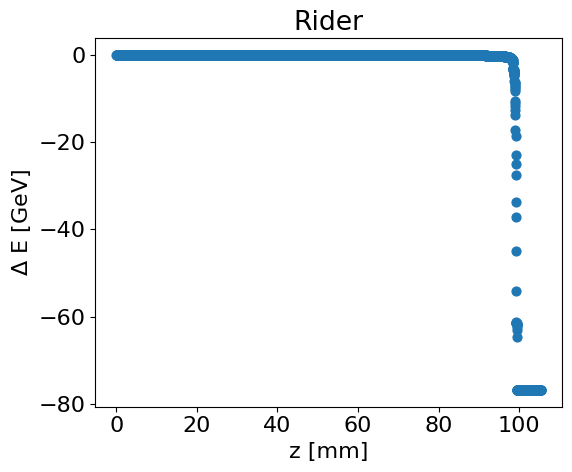

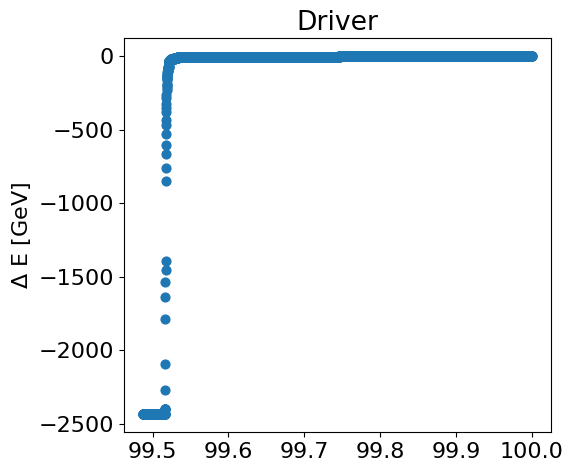

In [41]:
c_ms = 299792458

#transv_dist = 1e-4

m_particle_rider = 1.007319468  #proton -amu
m_particle_driver = 207.2 #lead, amu
#m_particle = 0.0005485   #electron -amu
#m_particle_driver = 315 #gold hexafloride, amu

stripped_ions_rider = 1.
stripped_ions_driver = 54.
charge_sign_rider= 1.
charge_sign_driver = 1.
#Pz_list = np.linspace(9.584300885e5,9.584295e4,30)
transv_distance_list = np.linspace(-2,-5,30)
min_dE_MeVs_rider = []
min_dE_MeVs_driver = []
fracs_E_rider = []
fracs_E_driver = []
        
for i in range(0,len(transv_distance_list)):
#for i in range(0,1):
        
        starting_Pz_rider = 9.584300885e5 #Pz_list[i]   #3.25E5 corresponds to 1 TeV
        
        starting_Pz_driver = -starting_Pz_rider/m_particle_driver*m_particle_rider  #actually velocity-like, mass factored later
        transv_mom_rider = 1e-6   #1e-2 is roughly 10keV scale
        transv_mom_driver = transv_mom_rider#*207 # lazy adding lead mass
        starting_distance_rider = 1e-3
        starting_distance_driver = 100.

        sim_type = 2    # type 2 used here, it is for bunch--bunch simulations
        pcount_rider = 1    #bunch counts
        pcount_driver = 1

        transv_distance_list = np.logspace(-1.5,-6,30)
        transv_dist = transv_distance_list[i]
        print(transv_distance_list[i])

        init_rider, E_MeV_rest_rider = init_bunch(starting_distance_rider,transv_mom_rider,starting_Pz_rider,stripped_ions_rider,m_particle_rider,transv_dist,pcount_rider,charge_sign_rider)

        init_driver, E_MeV_rest_driver = init_bunch(starting_distance_driver,transv_mom_driver,starting_Pz_driver,stripped_ions_driver,m_particle_driver,-transv_dist,pcount_driver,charge_sign_driver)


        #### parameters not used in this test, but required to run integrator
        bunch_dist = 1E5   #bunch--bunch distance at which the driver bunch has maximum charge (gaussian mean)
        cav_spacing = 1E5  #distance to the subsequent driver bunch
        aperture = 1E5 #this parameter reused for bunch-driven gaussian sigma
        z_cutoff = 0
        wall_pos= 1E5


        #coarse initialization
        # static_steps = 1#set init_steps equal to tot_steps to test static integrator only
        # ret_steps = 25
        # step_size = 2e-6

        #interaction zone
        static_steps = 1
        ret_steps = 5500
        #step_size = 1e-7 #+ 2.3e-6 / ( (i+1) / (25) )
        step_size = 2e-8
        
        retarded_traj,retarded_drv_traj = retarded_integrator3(static_steps,ret_steps,step_size,wall_pos,aperture,sim_type,init_rider,init_driver,bunch_dist,cav_spacing,z_cutoff)#just use retarded_intergrator2 for retarded calcs
        #retarded_traj,retarded_drv_traj = retarded_integrator3(static_steps,ret_steps,step_size,wall_pos,aperture,sim_type,retarded_traj_pre[-1],retarded_drv_traj_pre[-1],bunch_dist,cav_spacing,z_cutoff)#just use retarded_intergrator2 for retarded calcs
        #retarded_traj,retarded_drv_traj = retarded_traj2,retarded_drv_traj2

        delta_e, delta_e_drv, tot_e, tot_e_drv, delta_e_keV, delta_e_MeV, tot_e_GeV, delta_e_keV_drv, delta_e_MeV_drv, tot_e_GeV_drv, zs, xs, zs_drv, xs_drv, bzs, bxs, bys, bdotxs, bdotys, bdotzs, Pzs, Pxs, Pys, Pts, gammas, tees, bzs_drv, bxs_drv, bys_drv, bdotxs_drv, bdotys_drv, bdotzs_drv, Pzs_drv, Pxs_drv, Pys_drv, Pts_drv, gammas_drv, tees_drv, qs_drv, gam_fixed, bdotzs_seconds, q_statC_squared, q_kg_m3_sneg2, Pows_z_rider_watts = calculate_plotting_variables(retarded_traj,
        retarded_drv_traj, init_rider, init_driver, static_steps, ret_steps, E_MeV_rest_rider, E_MeV_rest_driver, c_ms)
        min_dE_MeVs_rider = np.append(min_dE_MeVs_rider,np.min(delta_e_MeV))
        min_dE_MeVs_driver = np.append(min_dE_MeVs_driver,np.min(delta_e_MeV_drv))
        # max_dE_MeVs_rider = np.append(max_dE_MeVs_rider,np.max(np.abs(delta_e_MeV)))
        # max_dE_MeVs_driver = np.append(max_dE_MeVs_driver,np.max(np.abs(delta_e_MeV_drv)))
        print(zs[-1])
        if tot_e_drv[-1] < tot_e_drv[0]:
                frac_E_rider = -np.divide(np.min(tot_e),tot_e[0])
                frac_E_driver = -np.divide(np.min(tot_e_drv),tot_e_drv[0])
                fracs_E_rider = np.append(fracs_E_rider,frac_E_rider)
                fracs_E_driver = np.append(fracs_E_driver,frac_E_driver)
                print("driver fractional energy shift", fracs_E_driver)
                print("rider fractional energy shift", fracs_E_rider)
        else:
                frac_E_rider = -np.divide(np.max(tot_e),tot_e[0])
                frac_E_driver = np.divide(np.max(tot_e_drv),tot_e_drv[0])
                fracs_E_rider = np.append(fracs_E_rider,frac_E_rider)
                fracs_E_driver = np.append(fracs_E_driver,frac_E_driver)
                print("driver fractional energy shift", fracs_E_driver)
                print("rider fractional energy shift", fracs_E_rider)

        fig = plt.figure(figsize=(6,5))
        ax = fig.add_subplot(1, 1, 1) 
        ax.scatter(zs,delta_e_MeV/1000,s=40)
        #ax.scatter(zs_drv,delta_e_MeV_drv,s=40)
        #ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
        ax.set_ylabel(r"$\Delta$ E [GeV]")
        ax.set_xlabel(r"z [mm]")
        #ax.axvline(30,color='g',label="wall paosition")
        #plt.xlim(starting_distance_rider/2,3)
        #plt.ylim(1E-2,2e3)
        #plt.xscale('log')  #log scale works at 1mm range
        #plt.yscale('log')
        plt.title("Rider")
        plt.tight_layout()
        #plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
        plt.show()

        fig = plt.figure(figsize=(6,5))
        ax = fig.add_subplot(1, 1, 1) 
        #ax.scatter(zs,delta_e_MeV,s=40)
        ax.scatter(zs_drv,delta_e_MeV_drv/1000,s=40)
        #ax.scatter(zs_drv,np.abs(delta_e_MeV_drv/1000),s=40)  #for log plotting
        #ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
        ax.set_ylabel(r"$\Delta$ E [GeV]")
        #ax.set_xlabel(r"z [mm]")
        #ax.axvline(30,color='g',label="wall paosition")
        #plt.xlim(-0.54,0.01)
        #plt.ylim(1E-5,5e3)
        #plt.xscale('log')
        #plt.yscale('log')
        plt.title("Driver")
        plt.tight_layout()
        #plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
        plt.show()





In [42]:
amu_kg = 1.66053907E-27
c_ms = 299792458 # Speed of light in m/s
mass_kg = m_particle_driver*amu_kg
vz_mmns = Pz_list/(m_particle_driver*gammas_drv[0]) #NOT mass_kg here
vz_ms = vz_mmns*1e6
Pz_kgms  = vz_ms*mass_kg*gammas_drv[0]
E_J     = Pz_kgms*c_ms
E_MeV_drv = E_J*6.242E12

In [43]:
amu_kg = 1.66053907E-27
c_ms = 299792458 # Speed of light in m/s
mass_kg = m_particle_rider*amu_kg
vz_mmns = Pz_list/(m_particle_rider*gammas[0]) #NOT mass_kg here
vz_ms = vz_mmns*1e6
Pz_kgms  = vz_ms*mass_kg*gammas[0]
E_J     = Pz_kgms*c_ms
E_MeV = E_J*6.242E12

In [81]:
(fracs_E_driver[8:]+1)*100

array([2.67607075e-02, 6.81823517e-02, 1.18595841e-01, 1.51358536e-01,
       2.61761962e-01, 3.42058377e-01, 7.89710891e-01, 1.51219949e+00,
       3.71564294e+00, 1.14801663e+01, 1.73080820e+01, 4.04612560e+01,
       5.19280850e+01, 6.12954162e+01, 7.60266295e+01, 7.65134437e+01,
       7.75179987e+01, 8.70888732e+01, 7.88759139e+01, 7.54674563e+01,
       7.98972669e+01, 8.10625571e+01])

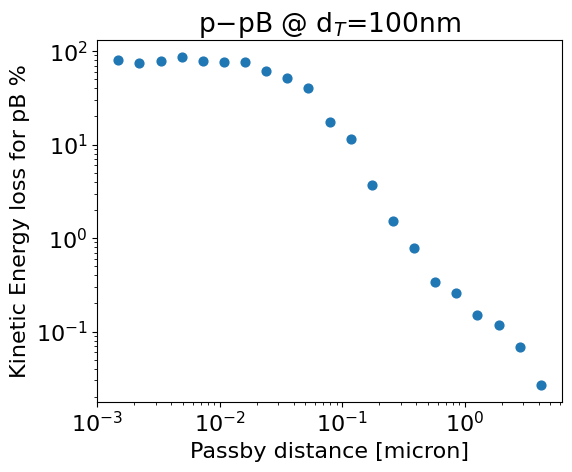

In [83]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
#ax.scatter(zs,delta_e_MeV,s=40)
ax.scatter(transv_distance_list[8:-1]*1000,(fracs_E_driver[8:-1]+1)*100,s=40,label="pB")
#ax.scatter(transv_distance_list[0:7]*1000,(fracs_E_driver[0:7]-1)*100,s=40,label="pB",color='C0')
#ax.scatter(E_MeV/1000,np.abs(fracs_E_rider-1)*100,s=40,label="p")
#ax.scatter(zs_drv,np.abs(delta_e_MeV_drv/1000),s=40)  #for log plotting
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Kinetic Energy loss for pB %")
ax.set_xlabel(r"Passby distance [micron]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-0.54,0.01)
#plt.ylim(1E-5,5e3)
plt.xscale('log')
plt.yscale('log')
plt.title("p$-$pB @ d$_T$=100nm")
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()

In [45]:
fracs_E_driver

array([ 1.00000005,  1.00000015,  1.00000067,  1.00000278,  1.00000965,
        1.0000243 ,  1.00003103, -0.99994942, -0.99973239, -0.99931818,
       -0.99881404, -0.99848641, -0.99738238, -0.99657942, -0.99210289,
       -0.98487801, -0.96284357, -0.88519834, -0.82691918, -0.59538744,
       -0.48071915, -0.38704584, -0.23973371, -0.23486556, -0.22482001,
       -0.12911127, -0.21124086, -0.24532544, -0.20102733, -0.18937443])

In [46]:
fracs_E_rider

array([-1.00000059, -1.00000164, -1.00000153, -1.0000013 , -1.00000047,
       -1.00000176, -1.00000057, -0.99956297, -0.99932106, -0.99904761,
       -0.99877348, -0.99847239, -0.99820288, -0.99754835, -0.99622769,
       -0.99470734, -0.99256575, -0.98662454, -0.984981  , -0.97941057,
       -0.96045405, -0.96490815, -0.97261008, -0.97476548, -0.97472039,
       -0.96088098, -0.97365221, -0.95961654, -0.97333177, -0.97438273])

In [47]:
np.append(max_dE_MeVs_driver,1)

NameError: name 'max_dE_MeVs_driver' is not defined

In [ ]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,delta_e_MeV/1000,s=40)
#ax.scatter(zs_drv,delta_e_MeV_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"$\Delta$ E [GeV]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(starting_distance_rider/2,3)
#plt.ylim(1E-2,2e3)
#plt.xscale('log')  #log scale works at 1mm range
#plt.yscale('log')
plt.title("Rider")
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
#ax.scatter(zs,delta_e_MeV,s=40)
ax.scatter(zs_drv,delta_e_MeV_drv/1000,s=40)
#ax.scatter(zs_drv,np.abs(delta_e_MeV_drv/1000),s=40)  #for log plotting
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"$\Delta$ E [GeV]")
#ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-0.54,0.01)
#plt.ylim(1E-5,5e3)
#plt.xscale('log')
#plt.yscale('log')
plt.title("Driver")
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()



In [ ]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
#ax.scatter(zs,delta_e_MeV,s=40)
ax.scatter(zs_drv,delta_e_MeV_drv/1000,s=40)
#ax.scatter(zs_drv,np.abs(delta_e_MeV_drv/1000),s=40)  #for log plotting
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"$\Delta$ E [GeV]")
#ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-0.54,0.01)
#plt.ylim(1E-5,5e3)
#plt.xscale('log')
#plt.yscale('log')
plt.title("Driver")
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()



In [ ]:
10/3000*100

In [ ]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,delta_e_MeV/1000,s=40)
#ax.scatter(zs_drv,delta_e_MeV_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"$\Delta$ E [GeV]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(starting_distance_rider/2,3)
#plt.ylim(1E-2,2e3)
#plt.xscale('log')  #log scale works at 1mm range
#plt.yscale('log')
plt.title("Rider")
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()

In [ ]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
#ax.scatter(zs,delta_e_MeV,s=40)
ax.scatter(zs_drv,delta_e_MeV_drv/1000,s=40)
#ax.scatter(zs_drv,np.abs(delta_e_MeV_drv/1000),s=40)  #for log plotting
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"$\Delta$ E [GeV]")
#ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-0.54,0.01)
#plt.ylim(1E-5,5e3)
#plt.xscale('log')
#plt.yscale('log')
plt.title("Driver")
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()



In [ ]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,Pzs,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pz")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,Pzs_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pz")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()

In [ ]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,zs,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"zs")
ax.set_xlabel(r"zs_drv [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.ylim(2E-2,5)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()

### Various other plots

In [ ]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,Pts,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pt")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,Pts_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pt_drv")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()

In [ ]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,Pys,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pys")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,Pys_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pys_drv")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()

In [ ]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,Pxs,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pxs")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,Pxs_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pxs_drv")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()

In [ ]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,gammas,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"gammas [mm]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,gammas_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"gammas_drvs [mm]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()

In [ ]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,bzs,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"bzs [mm]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,np.abs(bzs_drv),s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"|bzs_drvs| [mm]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()